In [98]:
df = pd.read_csv('VAW.csv')
df.head()


,DATAFLOW,FREQ: Frequency,TIME_PERIOD: Time,GEO_PICT: Pacific Island Countries and territories,TOPIC: Topic,INDICATOR: Indicator,SEX: Sex,AGE: Age,CONDITION: Women’s condition,VIOLENCE_TYPE: Type of violence,...,OUTCOME: Outcome,RESPONSE: Response,HELP_REASON: Reason for searching help,HELP_PROVIDER: Help provider,OBS_VALUE,UNIT_MEASURE: Unit of measure,UNIT_MULT: Unit multiplier,OBS_STATUS: Observation Status,DATA_SOURCE: Data source,OBS_COMMENT: Comment
0,SPC:DF_VAW(1.0),A: Annual,2013,CK: Cook Islands,VAW_TOPIC_001: Types of violence against women...,NUMPERRF: Number of persons in relative frequency,F: Female,Y15T64: 15-64,EVPART: Ever-partnered,CONT_ECON: At least one act of economic abusive,...,_T: Any,_T: Any,_T: Any,_T: Any,6.2,PERCENT: percent,NaN,NaN,FHSS,NaN
1,SPC:DF_VAW(1.0),A: Annual,2013,CK: Cook Islands,VAW_TOPIC_001: Types of violence against women...,NUMPERRF: Number of persons in relative frequency,F: Female,Y15T64: 15-64,EVPART: Ever-partnered,EMO: Emotional violence,...,_T: Any,_T: Any,_T: Any,_T: Any,9.6,PERCENT: percent,NaN,NaN,FHSS,NaN
2,SPC:DF_VAW(1.0),A: Annual,2013,CK: Cook Islands,VAW_TOPIC_001: Types of violence against women...,NUMPERRF: Number of persons in relative frequency,F: Female,Y15T64: 15-64,EVPART: Ever-partnered,EMO: Emotional violence,...,_T: Any,_T: Any,_T: Any,_T: Any,26.7,PERCENT: percent,NaN,NaN,FHSS,NaN
3,SPC:DF_VAW(1.0),A: Annual,2013,CK: Cook Islands,VAW_TOPIC_001: Types of violence against women...,NUMPERRF: Number of persons in relative frequency,F: Female,Y15T64: 15-64,EVPART: Ever-partnered,PHYS: Physical violence,...,_T: Any,_T: Any,_T: Any,_T: Any,6.7,PERCENT: percent,NaN,NaN,FHSS,NaN
4,SPC:DF_VAW(1.0),A: Annual,2013,CK: Cook Islands,VAW_TOPIC_001: Types of violence against women...,NUMPERRF: Number of persons in relative frequency,F: Female,Y15T64: 15-64,EVPART: Ever-partnered,PHYS: Physical violence,...,_T: Any,_T: Any,_T: Any,_T: Any,30.2,PERCENT: percent,NaN,NaN,FHSS,NaN


df_numerical = df.copy(deep=True)
df_numerical.drop(['FREQ: Frequency','DATAFLOW', 'OBS_VALUE',
'OBS_COMMENT: Comment','OBS_STATUS: Observation Status',
'SEX: Sex', 'UNIT_MULT: Unit multiplier', 'AGE: Age', 'INDICATOR: Indicator'
, 'UNIT_MEASURE: Unit of measure',
'HELP_PROVIDER: Help provider', 'HELP_REASON: Reason for searching help'
, 'RESPONSE: Response', 'LIFEPER: Period of life'], axis=1,inplace=True)
def handle_non_numerical_data(df):
 columns = df.columns.values
 for column in columns:
  text_digit_vals = {}
  def convert_to_int(val):
   return text_digit_vals[val]

  if df[column].dtype != np.int64 and df[column].dtype != np.float64:
   column_contents = df[column].values.tolist()
   unique_elements = set(column_contents)
   x = 1
   for unique in unique_elements:
    if unique == '_T: Any':
     text_digit_vals[unique] = 0
    elif unique not in text_digit_vals:
     text_digit_vals[unique] = x
     x += 1
   df[column] = list(map(convert_to_int, df[column]))
 return df

df_numerical = handle_non_numerical_data(df_numerical)

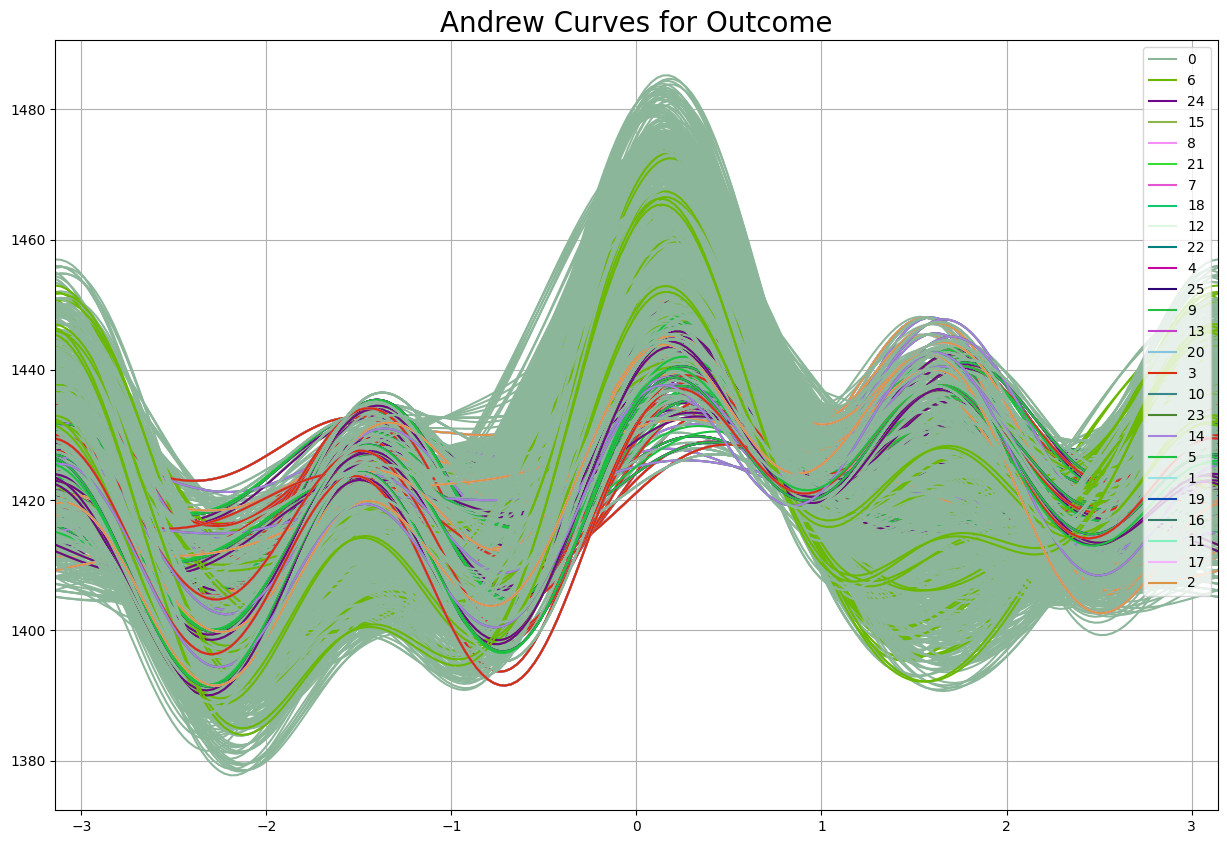

In [5]:
 from pandas import plotting
plt.rcParams['figure.figsize'] = (15, 10)
plotting.andrews_curves(df_numerical,'OUTCOME: Outcome')
plt.title('Andrew Curves for Outcome', fontsize = 20)
plt.show()

In [30]:
%pip install matplotlib

import warnings
warnings.filterwarnings('ignore')

print('CONDITION: Women’s condition\n')
Z = df['CONDITION: Women’s condition']
counter = Counter(Z)

for k,v in counter.items():
 per = v / len(Z) * 100
 print('Class=%s, Count=%d, Percentage=%.3f%%' % (k, v, per))
    
print('\nCONDITION: Women’s condition - NUMERICAL\n')
Z_numerical = df_numerical['CONDITION: Women’s condition']
counter = Counter(Z_numerical)

for k,v in counter.items():
 per = v / len(Z_numerical) * 100
 print('Class=%s, Count=%d, Percentage=%.3f%%' % (k, v, per))
    
print('\n\nVIOLENCE_TYPE: Type of violence\n')
Z = df['VIOLENCE_TYPE: Type of violence']
counter = Counter(Z)

for k,v in counter.items():
 per = v / len(Z) * 100
 print('Class=%s, Count=%d, Percentage=%.3f%%' % (k, v, per))
    
print('\nVIOLENCE_TYPE: Type of violence - NUMERICAL\n')
Z_numerical = df_numerical['VIOLENCE_TYPE: Type of violence']
counter = Counter(Z_numerical)

for k,v in counter.items():
 per = v / len(Z_numerical) * 100
 print('Class=%s, Count=%d, Percentage=%.3f%%' % (k, v, per))
    
plt.rcParams['figure.figsize'] = (18, 8)
plt.subplot(1, 2, 1)
sns.set(style = 'whitegrid')
sns.distplot(df_numerical['CONDITION: Women’s condition'])
plt.title('Distribution of Women’s condition', fontsize = 20)
plt.xlabel('Range of Women’s condition')
plt.ylabel('Count')
plt.subplot(1, 2, 2)
sns.set(style = 'whitegrid')
sns.distplot(df_numerical['VIOLENCE_TYPE: Type of violence'], color = 'red')
plt.title('Distribution of type of violence', fontsize = 20)
plt.xlabel('Range of type of violence')
plt.ylabel('Count')
plt.show()

TOPIC: Topic

Class=VAW_TOPIC_001: Types of violence against women by partner, Count=160, Percentage=7.937%
Class=VAW_TOPIC_002: Partner Physical violence by severity, Count=32, Percentage=1.587%
Class=VAW_TOPIC_003: Act of physical violence by partners, Count=192, Percentage=9.524%
Class=VAW_TOPIC_004: Acts of sexual violence by partners, Count=96, Percentage=4.762%
Class=VAW_TOPIC_005: Acts of emotional  violence by partners, Count=96, Percentage=4.762%
Class=VAW_TOPIC_006: Acts of controlling behaviours by partners, Count=128, Percentage=6.349%
Class=VAW_TOPIC_007: Types of violence against women by others (non-partners), Count=144, Percentage=7.143%
Class=VAW_TOPIC_008: Non-Partner Physical violence by type of perpetrator, Count=128, Percentage=6.349%
Class=VAW_TOPIC_009: Non-Partner Sexual violence by type of perpetrator, Count=128, Percentage=6.349%
Class=VAW_TOPIC_010: Child sexual abuse prevalence by type of perpetrator, Count=80, Percentage=3.968%
Class=VAW_TOPIC_011: Injuries

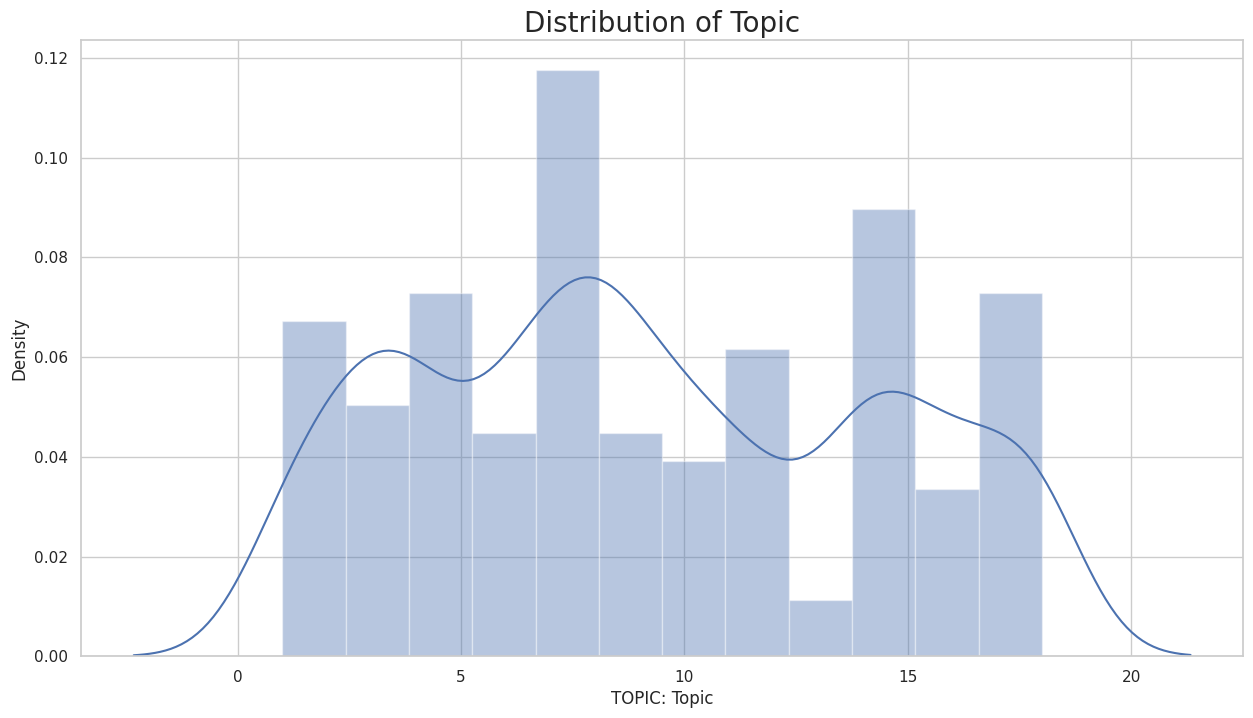

In [96]:
print('TOPIC: Topic\n')
Z = df['TOPIC: Topic']
counter = Counter(Z)
for k,v in counter.items():
  per = v / len(Z) * 100
  print('Class=%s, Count=%d, Percentage=%.3f%%' % (k, v, per))\
    
print('\nTOPIC: Topic - NUMERICAL\n')
Z_numerical = df_numerical['TOPIC: Topic']
counter = Counter(Z_numerical)
for k,v in counter.items():
  per = v / len(Z_numerical) * 100
  print('Class=%s, Count=%d, Percentage=%.3f%%' % (k, v, per))
    
plt.rcParams['figure.figsize'] = (15, 8)
sns.distplot(df_numerical['TOPIC: Topic'])
plt.title('Distribution of Topic', fontsize = 20)
plt.show()



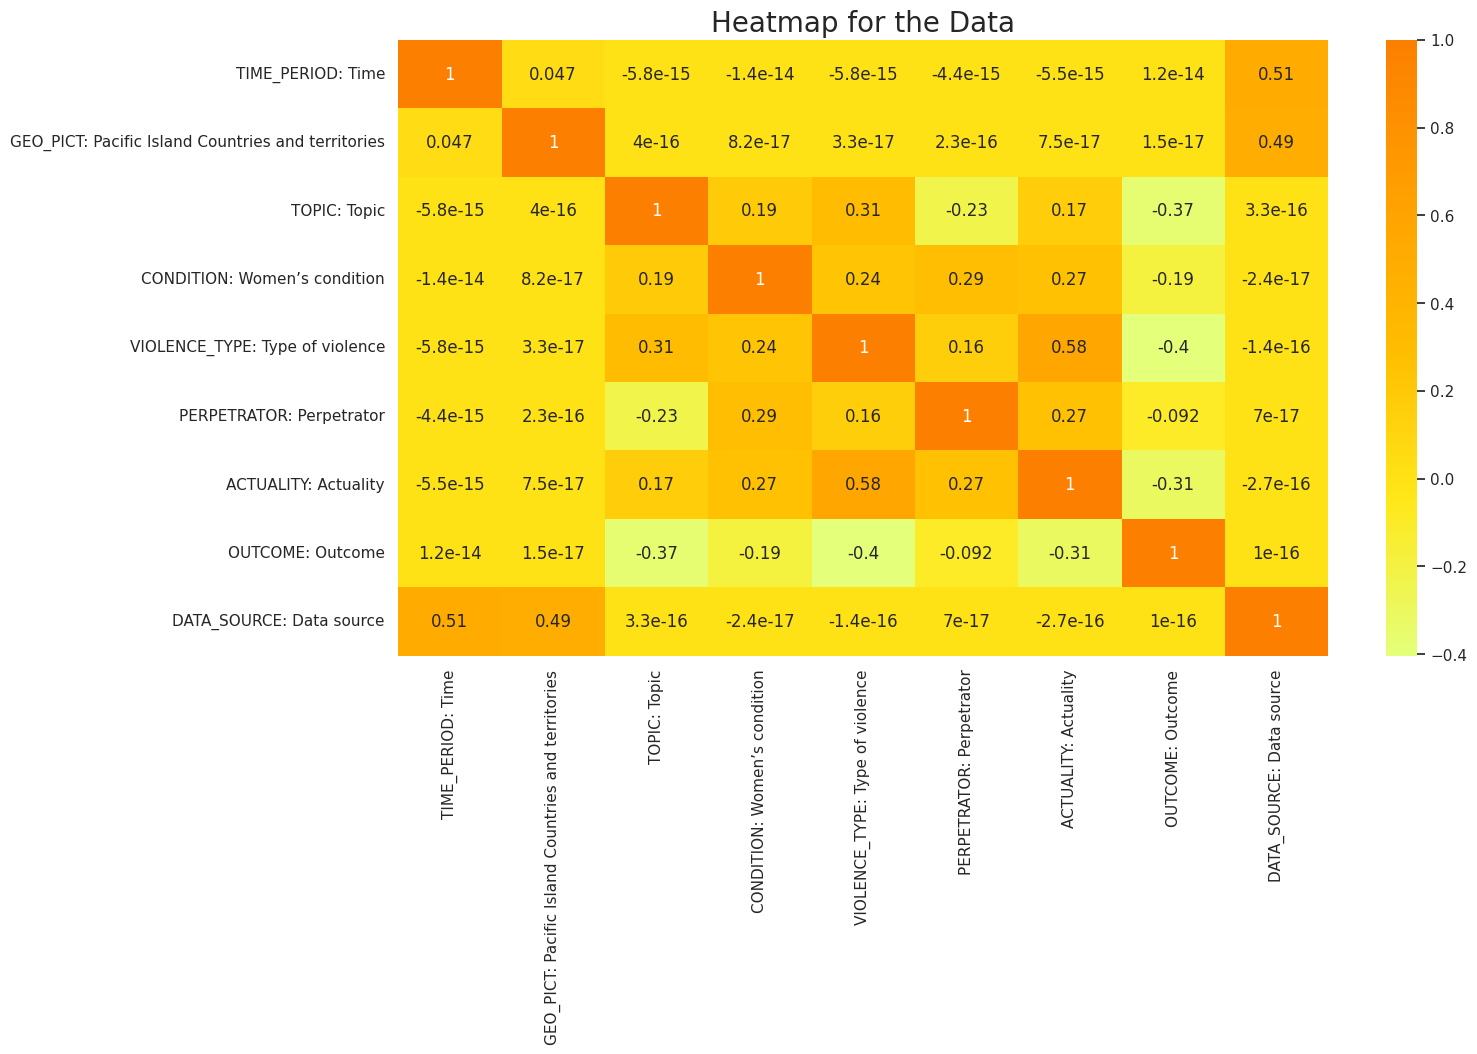

In [94]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.heatmap(df_numerical.corr(), cmap = 'Wistia', annot = True)
plt.title('Heatmap for the Data', fontsize = 20)
plt.show()


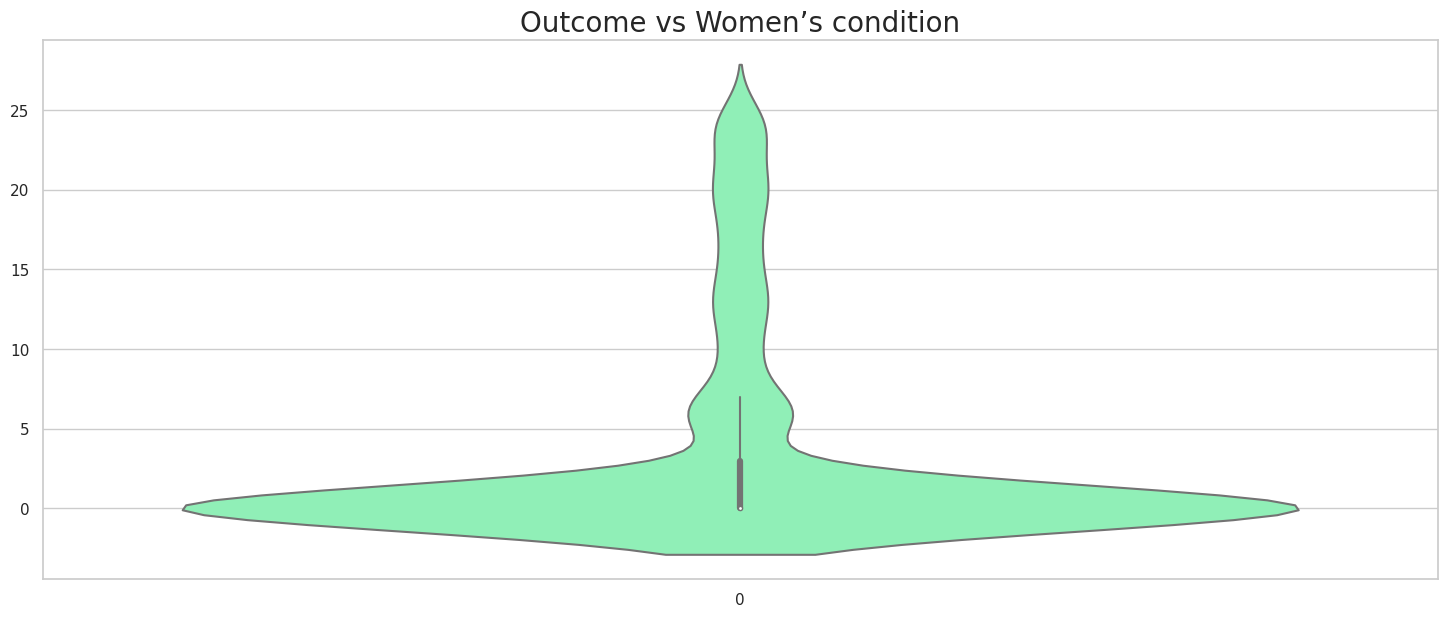

In [27]:
plt.rcParams['figure.figsize'] = (18, 7)
sns.violinplot(df_numerical['OUTCOME: Outcome'],palette = 'rainbow')
plt.title('Outcome vs Women’s condition', fontsize = 20)
plt.show()

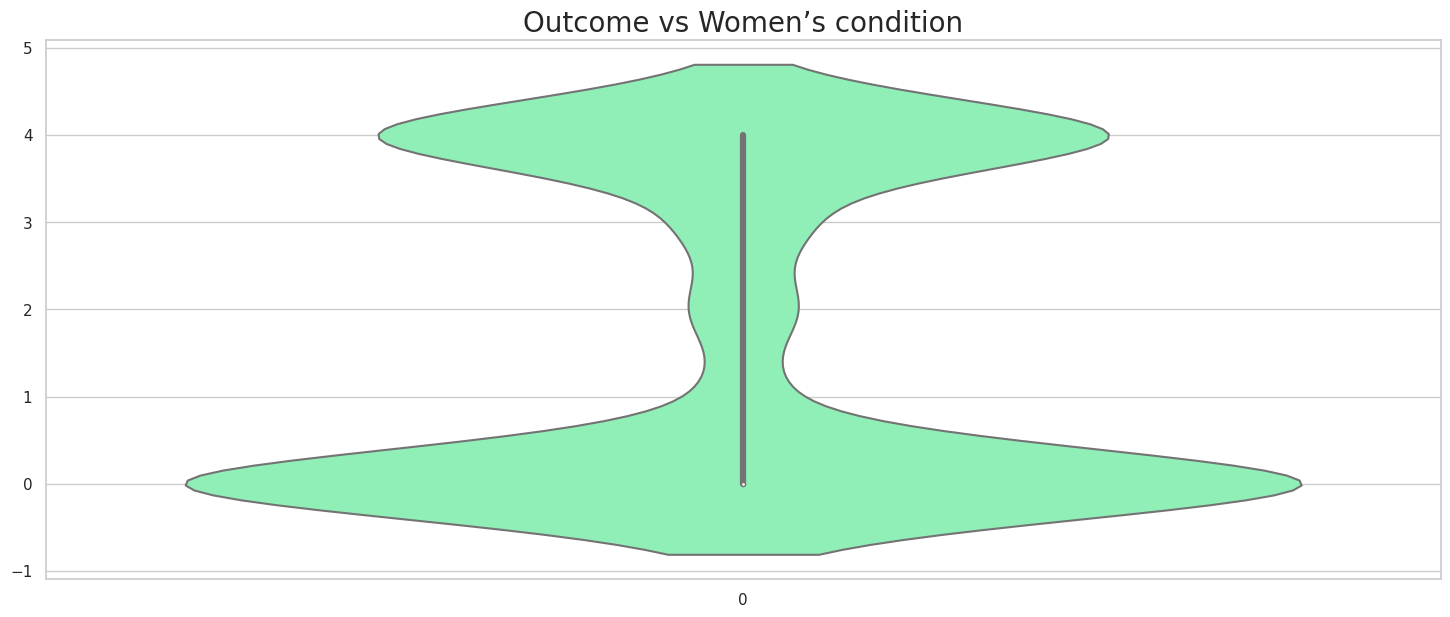

In [28]:
plt.rcParams['figure.figsize'] = (18, 7)
sns.violinplot(df_numerical['CONDITION: Women’s condition'],palette = 'rainbow')
plt.title('Outcome vs Women’s condition', fontsize = 20)
plt.show()

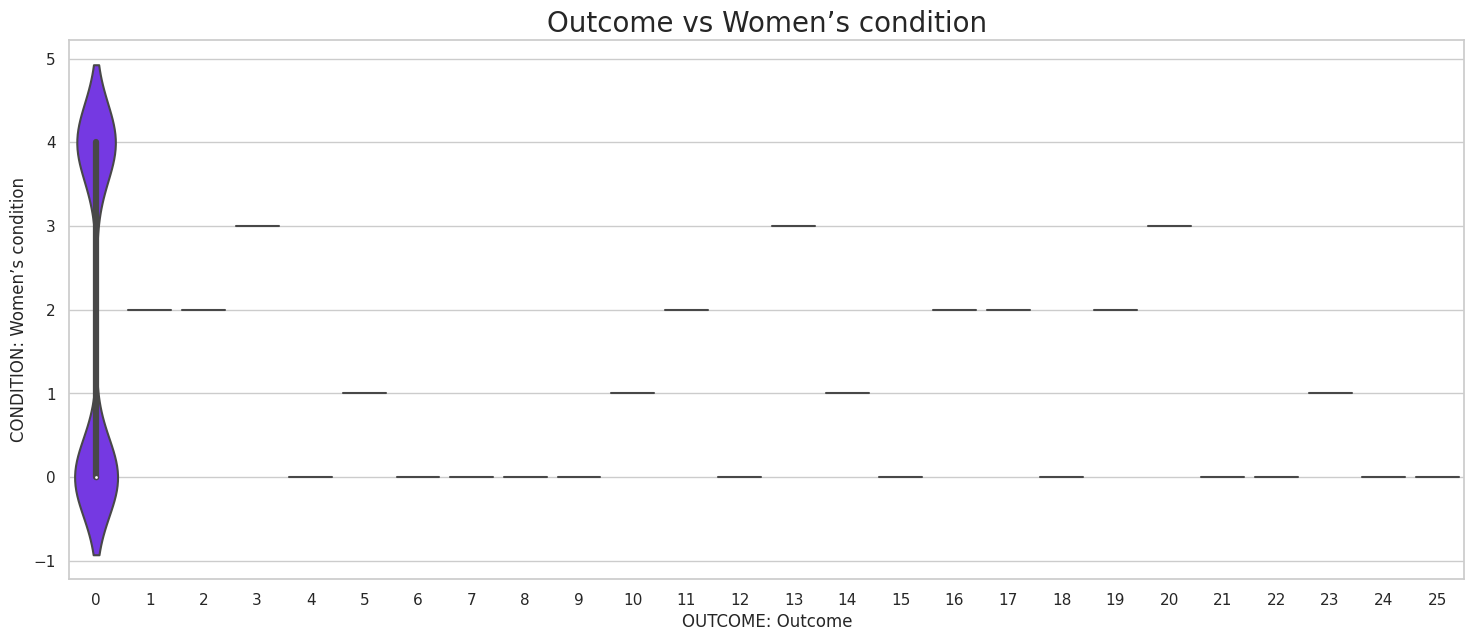

In [33]:
 plt.rcParams['figure.figsize'] = (18, 7)
sns.violinplot(x=df_numerical['OUTCOME: Outcome'], y=df_numerical['CONDITION: Women’s condition'], palette = 'rainbow')
plt.title('Outcome vs Women’s condition', fontsize = 20)
plt.show()

In [34]:
 # COUNT MISSING OR NULL VALUES
df = df.replace('_T: Any', np.NaN)
Y_null = df['OUTCOME: Outcome']
X_null = df.loc[:, df.columns != 'OUTCOME: Outcome']
x_null = X_null.isnull().sum()
y_null = Y_null.isnull().sum()
print('\nMissing values in X:\n', x_null)
print('\nNumber of rows with OUTCOME ANY:\n', y_null)


Missing values in X:
 DATAFLOW                                                 0
FREQ: Frequency                                          0
TIME_PERIOD: Time                                        0
GEO_PICT: Pacific Island Countries and territories       0
TOPIC: Topic                                             0
INDICATOR: Indicator                                     0
SEX: Sex                                                 0
AGE: Age                                                 0
CONDITION: Women’s condition                          1056
VIOLENCE_TYPE: Type of violence                        704
PERPETRATOR: Perpetrator                               256
ACTUALITY: Actuality                                   832
LIFEPER: Period of life                               1536
RESPONSE: Response                                    1904
HELP_REASON: Reason for searching help                1920
HELP_PROVIDER: Help provider                          1936
OBS_VALUE                        

In [35]:
 df_not_any = df[df['OUTCOME: Outcome'].notnull()]
X = df_not_any.loc[:, df.columns != 'OUTCOME: Outcome']
Y = df_not_any['OUTCOME: Outcome']
print("\nDATASET SHAPE WITH OUTCOME!=ANY: \n", df_not_any.shape)
df_with_any = df[df['OUTCOME: Outcome'].isnull()]
X_with_any = df_with_any.loc[:, df.columns != 'OUTCOME: Outcome'].reset_index()
print("DATASET SHAPE WITH OUTCOME=ANY: \n", df_with_any.shape)



DATASET SHAPE WITH OUTCOME!=ANY: 
 (544, 23)
DATASET SHAPE WITH OUTCOME=ANY: 
 (1472, 23)


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=0)
print("\nX_train shape: \n", X_train.shape)
x_null = X_train.isnull().sum()
print("\nNumber of missing values in X_train before drop: \n", x_null)



X_train shape: 
 (435, 22)

Number of missing values in X_train before drop: 
 DATAFLOW                                                0
FREQ: Frequency                                         0
TIME_PERIOD: Time                                       0
GEO_PICT: Pacific Island Countries and territories      0
TOPIC: Topic                                            0
INDICATOR: Indicator                                    0
SEX: Sex                                                0
AGE: Age                                                0
CONDITION: Women’s condition                          220
VIOLENCE_TYPE: Type of violence                       328
PERPETRATOR: Perpetrator                              120
ACTUALITY: Actuality                                  328
LIFEPER: Period of life                               394
RESPONSE: Response                                    435
HELP_REASON: Reason for searching help                435
HELP_PROVIDER: Help provider                      

In [37]:
X_train.drop(['RESPONSE: Response', 'HELP_REASON: Reason for searching help',
'HELP_PROVIDER: Help provider', 'UNIT_MULT: Unit multiplier', 'OBS_COMMENT: Comment', 'DATA_SOURCE: Data source'], axis=1, inplace=True)
X_test.drop(['RESPONSE: Response', 'HELP_REASON: Reason for searching help', 'HELP_PROVIDER: Help provider', 'UNIT_MULT: Unit multiplier', 'OBS_COMMENT: Comment', 'DATA_SOURCE: Data source'], axis=1, inplace=True)
x_null = X_train.isnull().sum()
print("\nNumber of missing values in X_train after drop and before impute: \n", x_null)


Number of missing values in X_train after drop and before impute: 
 DATAFLOW                                                0
FREQ: Frequency                                         0
TIME_PERIOD: Time                                       0
GEO_PICT: Pacific Island Countries and territories      0
TOPIC: Topic                                            0
INDICATOR: Indicator                                    0
SEX: Sex                                                0
AGE: Age                                                0
CONDITION: Women’s condition                          220
VIOLENCE_TYPE: Type of violence                       328
PERPETRATOR: Perpetrator                              120
ACTUALITY: Actuality                                  328
LIFEPER: Period of life                               394
OBS_VALUE                                             205
UNIT_MEASURE: Unit of measure                           0
OBS_STATUS: Observation Status                        237
dty

In [38]:
for col_name in X_train.columns:
 unique_cat = len(X_train[col_name].unique())
 print("Feature '{col_name}' has {unique_cat} unique cotegories".format(col_name=col_name, unique_cat=unique_cat))

Feature 'DATAFLOW' has 1 unique cotegories
Feature 'FREQ: Frequency' has 1 unique cotegories
Feature 'TIME_PERIOD: Time' has 10 unique cotegories
Feature 'GEO_PICT: Pacific Island Countries and territories' has 13 unique cotegories
Feature 'TOPIC: Topic' has 5 unique cotegories
Feature 'INDICATOR: Indicator' has 1 unique cotegories
Feature 'SEX: Sex' has 1 unique cotegories
Feature 'AGE: Age' has 1 unique cotegories
Feature 'CONDITION: Women’s condition' has 4 unique cotegories
Feature 'VIOLENCE_TYPE: Type of violence' has 4 unique cotegories
Feature 'PERPETRATOR: Perpetrator' has 2 unique cotegories
Feature 'ACTUALITY: Actuality' has 3 unique cotegories
Feature 'LIFEPER: Period of life' has 2 unique cotegories
Feature 'OBS_VALUE' has 174 unique cotegories
Feature 'UNIT_MEASURE: Unit of measure' has 1 unique cotegories
Feature 'OBS_STATUS: Observation Status' has 2 unique cotegories


In [39]:
numeric_features = ['TIME_PERIOD: Time', 'OBS_VALUE']
# Simple Imputer and Scaler for Numerical
numeric_transformer = Pipeline(
steps=[("imputer", SimpleImputer(missing_values=np.nan, strategy="mean")),("scaler", preprocessing.MinMaxScaler())])
categorical_features = ['DATAFLOW', 'FREQ: Frequency', 'GEO_PICT: Pacific Island Countries and territories',
'TOPIC: Topic', 'INDICATOR: Indicator', 'SEX: Sex', 'AGE: Age', 'CONDITION: Women’s condition',
'VIOLENCE_TYPE: Type of violence', 'PERPETRATOR: Perpetrator', 'ACTUALITY: Actuality',
'LIFEPER: Period of life', 'UNIT_MEASURE: Unit of measure', 'OBS_STATUS: Observation Status']

# Simple Imputer and One Hot Encoder for Categorical
categorical_transformer = Pipeline(
steps=[("imputer", SimpleImputer(missing_values=np.nan, strategy="most_frequent")), ("ohe", OneHotEncoder(handle_unknown='ignore', sparse=False))])
preprocessor = ColumnTransformer(
  remainder='passthrough', #passthough features not listed
  transformers=[
    ("num", numeric_transformer, numeric_features),
    ("cat", categorical_transformer, categorical_features),
   ]
)

# fit preprocessor
# transform train+test
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)
# to dataframe
column_names = preprocessor.transformers_[1][1].named_steps['ohe'].get_feature_names_out(categorical_features).tolist()
X_train = pd.DataFrame(X_train, columns=numeric_features+column_names)
X_test = pd.DataFrame(X_test, columns=numeric_features+column_names)


                                                    importance
OBS_VALUE                                             0.378443
TIME_PERIOD: Time                                     0.067877
TOPIC: Topic_VAW_TOPIC_011: Injuries from physi...    0.065434
TOPIC: Topic_VAW_TOPIC_013: Impact of partner v...    0.061907
VIOLENCE_TYPE: Type of violence_PHYSORSEX: Phys...    0.058691
TOPIC: Topic_VAW_TOPIC_012: Impact of partner v...    0.045718
CONDITION: Women’s condition_EVPREG: Ever pregnant    0.028911
CONDITION: Women’s condition_CHI614: With child...    0.021375
CONDITION: Women’s condition_W4M: Working for m...    0.018646
GEO_PICT: Pacific Island Countries and territor...    0.018044
TOPIC: Topic_VAW_TOPIC_015: Impact of partner v...    0.017438
TOPIC: Topic_VAW_TOPIC_014: Impact of partner v...    0.017153
GEO_PICT: Pacific Island Countries and territor...    0.015550
GEO_PICT: Pacific Island Countries and territor...    0.015348
GEO_PICT: Pacific Island Countries and territor...    0

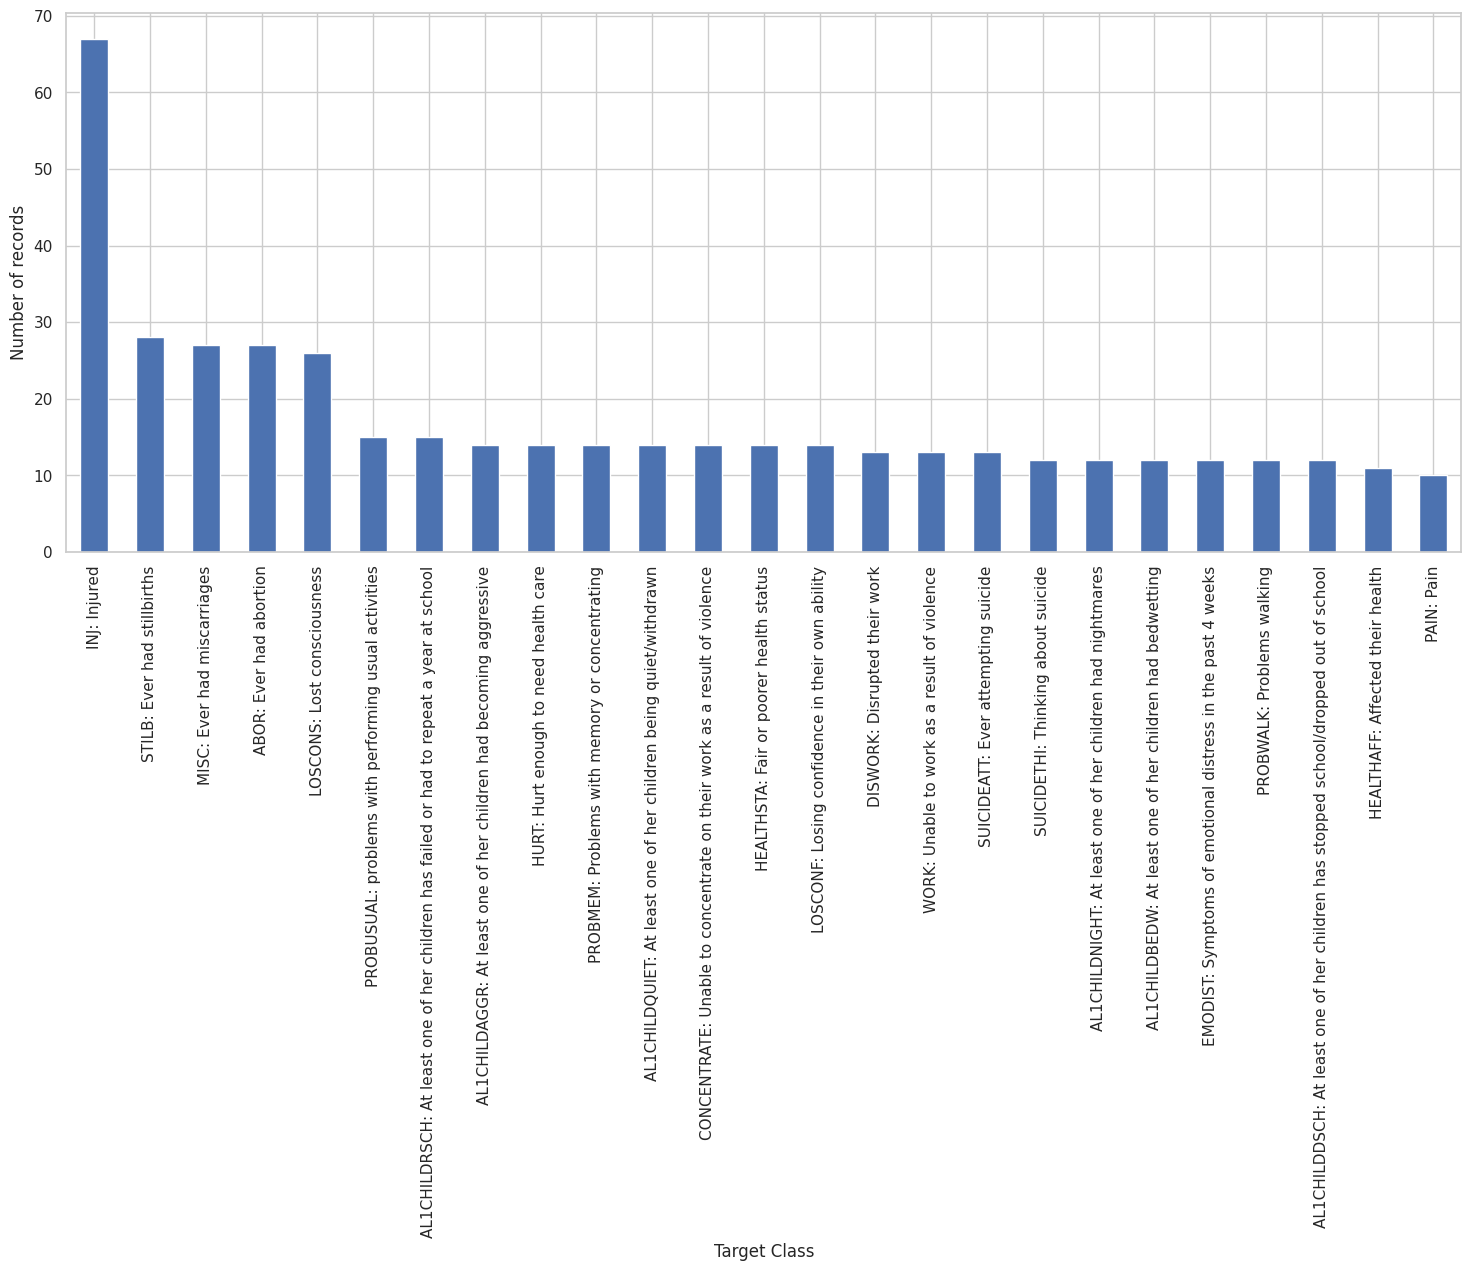

In [41]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
feature_importances = pd.DataFrame(rf.feature_importances_, index=X_train.columns,
columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)
count = y_train.value_counts()
count.plot.bar()
plt.ylabel('Number of records')
plt.xlabel('Target Class')
plt.show()

# column_names of rows with 0.0 importance = columns with only 1 category
columns_with_0_importance = feature_importances[(feature_importances == 0).all(axis=1)].index.tolist()

# ===================== DROP COLUMNS WITH 1 category IN TRAIN SET AND 0.0 FEATURE IMPORTANCE =====================
X_train.drop(columns_with_0_importance, axis=1, inplace=True)
X_test.drop(columns_with_0_importance, axis=1, inplace=True)


In [43]:
print('BEFORE OVERSAMPLING\n')
counter = Counter(y_train)
for k,v in counter.items():
  per = v / len(y_train) * 100
  print('Class=%s, Count=%d, Percentage=%.3f%%' % (k, v, per))
    
# smote = SMOTE(random_state=0)
# X_train, y_train = smote.fit_resample(X_train, y_train)

ros = RandomOverSampler(random_state=0)
X_train, y_train = ros.fit_resample(X_train, y_train)
print('\nAFTER OVERSAMPLING\n')
counter = Counter(y_train)
for k,v in counter.items():
  per = v / len(y_train) * 100
  print('Class=%s, Count=%d, Percentage=%.3f%%' % (k, v, per))


BEFORE OVERSAMPLING

Class=AL1CHILDNIGHT: At least one of her children had nightmares, Count=12, Percentage=2.759%
Class=DISWORK: Disrupted their work, Count=13, Percentage=2.989%
Class=LOSCONS: Lost consciousness, Count=26, Percentage=5.977%
Class=AL1CHILDDSCH: At least one of her children has stopped school/dropped out of school, Count=12, Percentage=2.759%
Class=PROBUSUAL: problems with performing usual activities, Count=15, Percentage=3.448%
Class=LOSCONF: Losing confidence in their own ability, Count=14, Percentage=3.218%
Class=INJ: Injured, Count=67, Percentage=15.402%
Class=PROBWALK: Problems walking, Count=12, Percentage=2.759%
Class=CONCENTRATE: Unable to concentrate on their work as a result of violence, Count=14, Percentage=3.218%
Class=HEALTHAFF: Affected their health, Count=11, Percentage=2.529%
Class=HURT: Hurt enough to need health care, Count=14, Percentage=3.218%
Class=ABOR: Ever had abortion, Count=27, Percentage=6.207%
Class=PAIN: Pain, Count=10, Percentage=2.299%
Cl

In [44]:
pca = PCA(n_components=7, random_state=0)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [46]:
# ================== MODEL RFC ========================
model_rf = RandomForestClassifier(random_state=0)
model_rf.fit(X_train, y_train)
y_pred = model_rf.predict(X_test)
# print(X_test.shape)
# y_test = y_test.to_numpy()
print("\n\nRANDOM FOREST\n")
print("Labels that do not appear in train set:\n", set(y_test) - set(y_pred))
print("\nRecall score:", recall_score(y_test, y_pred, average='macro',zero_division=0))
print("Precision score:", precision_score(y_test, y_pred, average='macro',zero_division=0))
print("Accuracy score:", accuracy_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred, average='macro', zero_division=0))

# print(classification_report(y_test, y_pred))
# ================== Grid-Search ========================
# import GridSearchCV

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
# instantiate classifier with default hyperparameters with kernel=rbf, C=1.0 and␣gamma=auto
svc=SVC()
# declare parameters for hyperparameter tuning
parameters = [ {'C':[1, 10, 100, 1000], 'kernel':['linear']},
{'C':[1, 10, 100, 1000], 'kernel':['rbf'], 'gamma':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
{'C':[1, 10, 100, 1000], 'kernel':['poly'], 'degree': [2,3,4],'gamma':[0.01,0.02,0.03,0.04,0.05]}
]

grid_search = GridSearchCV(estimator = svc,
              param_grid = parameters,
              scoring = 'accuracy',
              cv = 5,
              verbose=0)

grid_search.fit(X_train, y_train)
# examine the best model
# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))
# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))
# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))
# calculate GridSearch CV score on test set
print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(X_test, y_test)))



RANDOM FOREST

Labels that do not appear in train set:
 {'AL1CHILDDSCH: At least one of her children has stopped school/dropped out of school'}

Recall score: 0.08434482758620689
Precision score: 0.0775925925925926
Accuracy score: 0.25688073394495414
F1 score: 0.07809523809523808
GridSearch CV best score : 0.2907


Parameters that give the best results : 

 {'C': 1000, 'gamma': 0.8, 'kernel': 'rbf'}


Estimator that was chosen by the search : 

 SVC(C=1000, gamma=0.8)
GridSearch CV score on test set: 0.2385


In [47]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=10, weights='distance')
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)
print("\n\nKNN\n")
print("Labels that do not appear in train set:\n", set(y_test) - set(y_pred))
print("\nRecall score:", recall_score(y_test, y_pred, average='macro',zero_division=0))
print("Precision score:", precision_score(y_test, y_pred, average='macro',zero_division=0))
print("Accuracy score:", accuracy_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred, average='macro', zero_division=0))
# print(classification_report(y_test, y_pred))



KNN

Labels that do not appear in train set:
 set()

Recall score: 0.07296551724137931
Precision score: 0.0804029304029304
Accuracy score: 0.23853211009174313
F1 score: 0.07397979797979798


In [48]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=1, max_iter=1000)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
print("\n\nMLP\n")
print("Labels that do not appear in train set:\n", set(y_test) - set(y_pred))
print("\nRecall score:", recall_score(y_test, y_pred, average='macro',zero_division=0))
print("Precision score:", precision_score(y_test, y_pred, average='macro',zero_division=0))
print("Accuracy score:", accuracy_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred, average='macro', zero_division=0))



MLP

Labels that do not appear in train set:
 {'SUICIDEATT: Ever attempting suicide', 'AL1CHILDDSCH: At least one of her children has stopped school/dropped out of school'}

Recall score: 0.0823448275862069
Precision score: 0.06868783068783069
Accuracy score: 0.24770642201834864
F1 score: 0.07165079365079365


In [49]:
model_svm = SVC(C=1000, gamma=0.8, kernel='rbf', random_state=0)
model_svm.fit(X_train, y_train)
y_pred = model_svm.predict(X_test)
# print(X_test.shape)
print("\n\nSVC\n")
print("Labels that do not appear in train set:\n", set(y_test) - set(y_pred))
print("\nRecall score:", recall_score(y_test, y_pred, average='macro',zero_division=0))
print("Precision score:", precision_score(y_test, y_pred, average='macro',zero_division=0))
print("Accuracy score:", accuracy_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred, average='macro', zero_division=0))




SVC

Labels that do not appear in train set:
 {'AL1CHILDDSCH: At least one of her children has stopped school/dropped out of school'}

Recall score: 0.05772413793103448
Precision score: 0.06952380952380953
Accuracy score: 0.23853211009174313
F1 score: 0.06059816207184628


In [77]:
# ================ IMPLEMENT MODEL TO DATASET WITH OUTCOME ANY =================
# DROP COLUMNS
X_with_any_processed = X_with_any.copy(deep=True)
X_with_any_processed.drop(['RESPONSE: Response', 'HELP_REASON: Reason for searching help', 'HELP_PROVIDER: Help provider',
'UNIT_MULT: Unit multiplier', 'OBS_COMMENT: Comment', 'DATA_SOURCE: Data source'], axis=1, inplace=True)
# IMPLEMENT PREPROCESSOR
X_with_any_processed = preprocessor.transform(X_with_any_processed)
# to dataframe
X_with_any_processed = pd.DataFrame(X_with_any_processed, columns=numeric_features+column_names)
# DROP non-significant columns
X_with_any_processed.drop(columns_with_0_importance, axis=1, inplace=True)
# PCA
X_with_any_processed = pca.transform(X_with_any_processed)
# PREDICT WITH SVM
y_prediction = model_svm.predict(X_with_any_processed)
y_prediction = pd.DataFrame(y_prediction, columns=['OUTCOME'])
# print(X_with_any.shape)
# print(y_prediction.shape)
predictions_with_any = pd.concat([X_with_any, y_prediction], keys=X_with_any.columns+['OUTCOME'], axis=1)
# print(predictions_with_any.shape)
# predictions_with_any.to_csv('Users/andre/PycharmProjects/final_ML/OUTCOME.csv', encoding='utf-8')

In [83]:
# ================= MAKE CLUSTERS ===========================
# cluster 1 = CHILD AFFECTED
cluster_1 = ['AL1CHILDAGGR: At least one of her children had becoming aggressive',
'AL1CHILDBEDW: At least one of her children had bedwetting',
'AL1CHILDDSCH: At least one of her children has stopped school/dropped out of school',
'AL1CHILDNIGHT: At least one of her children had nightmares',
'AL1CHILDQUIET: At least one of her children being quiet/withdrawn',
'AL1CHILDRSCH: At least one of her children has failed or had to repeat a year at school']
# cluster 2 = LABOR ISSUES
cluster_2 = ['ABOR: Ever had abortion', 'MISC: Ever had miscarriages', 'STILB: Ever had stillbirths']
# cluster 3 = LIFE QUALITY ISSUES
cluster_3 = ['CONCENTRATE: Unable to concentrate on their work as a result of violence',
'LOSCONF: Losing confidence in their own ability',
'WORK: Unable to work as a result of violence',
'DISWORK: Disrupted their work',
'PROBMEM: Problems with memory or concentrating',
'PROBUSUAL: problems with performing usual activities']
# cluster 4 = LIGHT HEALTH ISSUES
cluster_4 = ['EMODIST: Symptoms of emotional distress in the past 4 weeks',
'HEALTHAFF: Affected their health',
'HEALTHSTA: Fair or poorer health status',
'PAIN: Pain']
# cluster 5 = HEAVY HEALTH ISSUES
cluster_5 = ['SUICIDEATT: Ever attempting suicide',
'SUICIDETHI: Thinking about suicide',
'PROBWALK: Problems walking',
'INJ: Injured',
'HURT: Hurt enough to need health care',
'LOSCONS: Lost consciousness']
# ================= REPLACE OUTCOME WITH CLUSTERS ===============
for i in cluster_1:
 Y = Y.replace(i, 1)
for i in cluster_2:
 Y = Y.replace(i, 2)
for i in cluster_3:
 Y = Y.replace(i, 3)
for i in cluster_4:
 Y = Y.replace(i, 4)
for i in cluster_5:
 Y = Y.replace(i, 5)

In [84]:
# ================= SPLIT TEST SET AND TRAIN SET ===========================
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=0)
# ================= COUNT NULL IN X_TRAIN ====================
x_null = X_train.isnull().sum()
# print("\nNumber of missing values in X_train before impute: \n", x_null)
# DROP COLUMN UNIT MULTIPLIER THAT ONLY HAS MISSING VALUES IN TRAIN: Number of missing values in X_train = 435
# ALSO DROP COLUMNS WITHOUT MEANING LIKE OBS_COMMENT AND OBS_VALUE
X_train.drop(['RESPONSE: Response', 'HELP_REASON: Reason for searching help','HELP_PROVIDER: Help provider', 'UNIT_MULT: Unit multiplier', 'OBS_COMMENT: Comment', 'DATA_SOURCE: Data source'], axis=1, inplace=True)
X_test.drop(['RESPONSE: Response', 'HELP_REASON: Reason for searching help','HELP_PROVIDER: Help provider', 'UNIT_MULT: Unit multiplier', 'OBS_COMMENT: Comment', 'DATA_SOURCE: Data source'], axis=1, inplace=True)
# ================= COUNT NULL IN X_TRAIN AFTER IMPUTE====================
x_null = X_train.isnull().sum()
# print("\nNumber of missing values in X_train before impute: \n", x_null)

# ================= COUNT NUMBER OF CATEGORIES OF EACH COLUMN IN TRAIN ====================
print('NUMBER OF UNIQUE CATEGORIES OF EACH COLUMN:\n')
for col_name in X_train.columns:
 unique_cat = len(X_train[col_name].unique())
 print("Feature '{col_name}' has {unique_cat} unique cotegories".format(col_name=col_name, unique_cat=unique_cat))


NUMBER OF UNIQUE CATEGORIES OF EACH COLUMN:

Feature 'DATAFLOW' has 1 unique cotegories
Feature 'FREQ: Frequency' has 1 unique cotegories
Feature 'TIME_PERIOD: Time' has 10 unique cotegories
Feature 'GEO_PICT: Pacific Island Countries and territories' has 13 unique cotegories
Feature 'TOPIC: Topic' has 5 unique cotegories
Feature 'INDICATOR: Indicator' has 1 unique cotegories
Feature 'SEX: Sex' has 1 unique cotegories
Feature 'AGE: Age' has 1 unique cotegories
Feature 'CONDITION: Women’s condition' has 4 unique cotegories
Feature 'VIOLENCE_TYPE: Type of violence' has 4 unique cotegories
Feature 'PERPETRATOR: Perpetrator' has 2 unique cotegories
Feature 'ACTUALITY: Actuality' has 3 unique cotegories
Feature 'LIFEPER: Period of life' has 2 unique cotegories
Feature 'OBS_VALUE' has 174 unique cotegories
Feature 'UNIT_MEASURE: Unit of measure' has 1 unique cotegories
Feature 'OBS_STATUS: Observation Status' has 2 unique cotegories


In [85]:
# ================= COUNT NUMBER OF CATEGORIES OF EACH COLUMN IN TRAIN␣====================
print('NUMBER OF UNIQUE CATEGORIES OF EACH COLUMN:\n')
for col_name in X_train.columns:
 unique_cat = len(X_train[col_name].unique())
 print("Feature '{col_name}' has {unique_cat} unique cotegories".format(col_name=col_name, unique_cat=unique_cat))
# ================= MOST-FREQUENT-IMPUTER AND ONE-HOT-ENCODING FOR CATEGORICAL VALUES AND MEAN-IMPUTER AND MIN-MAX-SCALER FOR NUMERICAL===========================
numeric_features = ['TIME_PERIOD: Time', 'OBS_VALUE']
# Simple Imputer and Scaler for Numerical
numeric_transformer = Pipeline(
steps=[("imputer", SimpleImputer(missing_values=np.nan, strategy="mean")),("scaler", preprocessing.MinMaxScaler())])
categorical_features = ['DATAFLOW', 'FREQ: Frequency', 'GEO_PICT: Pacific Island Countries and territories',
'TOPIC: Topic', 'INDICATOR: Indicator', 'SEX: Sex', 'AGE: Age', 'CONDITION: Women’s condition',
'VIOLENCE_TYPE: Type of violence', 'PERPETRATOR: Perpetrator', 'ACTUALITY: Actuality',
'LIFEPER: Period of life', 'UNIT_MEASURE: Unit of measure', 'OBS_STATUS: Observation Status']
# Simple Imputer and One Hot Encoder for Categorical
categorical_transformer = Pipeline(
steps=[("imputer", SimpleImputer(missing_values=np.nan, strategy="most_frequent")), ("ohe", OneHotEncoder(handle_unknown='ignore', sparse=False))])
preprocessor = ColumnTransformer(
               remainder='passthrough', #passthough features not listed
               transformers=[
                 ("num", numeric_transformer, numeric_features),
                 ("cat", categorical_transformer, categorical_features),
         ]
   )
# fit preprocessor
# transform train+test
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)
# to dataframe
column_names = preprocessor.transformers_[1][1].named_steps['ohe'].get_feature_names_out(categorical_features).tolist()

X_train = pd.DataFrame(X_train, columns=numeric_features+column_names)
X_test = pd.DataFrame(X_test, columns=numeric_features+column_names)


NUMBER OF UNIQUE CATEGORIES OF EACH COLUMN:

Feature 'DATAFLOW' has 1 unique cotegories
Feature 'FREQ: Frequency' has 1 unique cotegories
Feature 'TIME_PERIOD: Time' has 10 unique cotegories
Feature 'GEO_PICT: Pacific Island Countries and territories' has 13 unique cotegories
Feature 'TOPIC: Topic' has 5 unique cotegories
Feature 'INDICATOR: Indicator' has 1 unique cotegories
Feature 'SEX: Sex' has 1 unique cotegories
Feature 'AGE: Age' has 1 unique cotegories
Feature 'CONDITION: Women’s condition' has 4 unique cotegories
Feature 'VIOLENCE_TYPE: Type of violence' has 4 unique cotegories
Feature 'PERPETRATOR: Perpetrator' has 2 unique cotegories
Feature 'ACTUALITY: Actuality' has 3 unique cotegories
Feature 'LIFEPER: Period of life' has 2 unique cotegories
Feature 'OBS_VALUE' has 174 unique cotegories
Feature 'UNIT_MEASURE: Unit of measure' has 1 unique cotegories
Feature 'OBS_STATUS: Observation Status' has 2 unique cotegories


                                                    importance
TOPIC: Topic_VAW_TOPIC_013: Impact of partner v...    0.192253
TOPIC: Topic_VAW_TOPIC_011: Injuries from physi...    0.115721
OBS_VALUE                                             0.109808
CONDITION: Women’s condition_CHI614: With child...    0.099040
CONDITION: Women’s condition_EVPREG: Ever pregnant    0.098366
TOPIC: Topic_VAW_TOPIC_015: Impact of partner v...    0.096228
TOPIC: Topic_VAW_TOPIC_012: Impact of partner v...    0.070277
TOPIC: Topic_VAW_TOPIC_014: Impact of partner v...    0.060125
CONDITION: Women’s condition_W4M: Working for m...    0.052511
VIOLENCE_TYPE: Type of violence_PHYSORSEX: Phys...    0.019611
TIME_PERIOD: Time                                     0.016543
ACTUALITY: Actuality_ALOLIFE: At least once in ...    0.012613
ACTUALITY: Actuality_ALO12M: At least once in t...    0.010703
VIOLENCE_TYPE: Type of violence_PHYS: Physical ...    0.005161
GEO_PICT: Pacific Island Countries and territor...    0

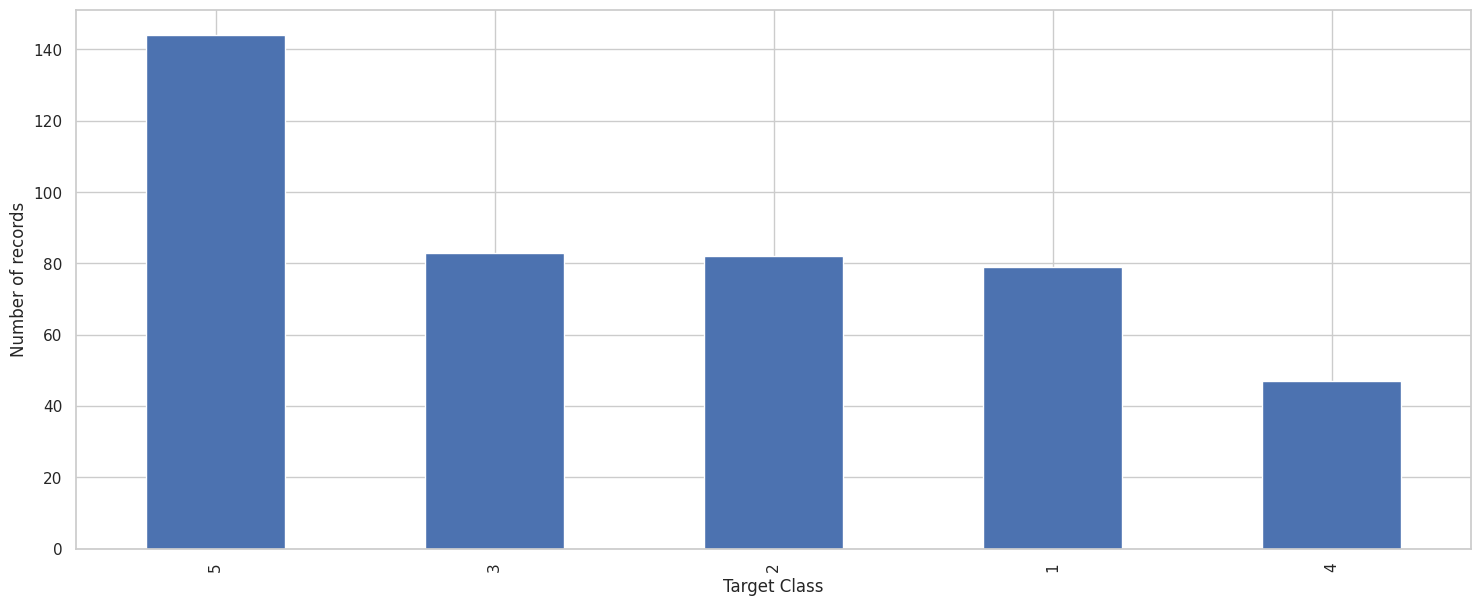

In [86]:
# ===================== FEATURE IMPORTANCE =====================
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
feature_importances = pd.DataFrame(rf.feature_importances_, index=X_train.columns,columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)
print('\n\nCLUSTER DISTRIBUTION IN X_TRAIN:\n')
count = y_train.value_counts()
count.plot.bar()
plt.ylabel('Number of records')
plt.xlabel('Target Class')
plt.show()


In [87]:
# column_names of rows with 0.0 importance = columns with only 1 category
columns_with_0_importance = feature_importances[(feature_importances == 0).all(axis=1)].index.tolist()
# ===================== DROP COLUMNS WITH 1 category IN TRAIN SET AND 0.0FEATURE IMPORTANCE =====================
X_train.drop(columns_with_0_importance, axis=1, inplace=True)
X_test.drop(columns_with_0_importance, axis=1, inplace=True)
# ================== OVERSAMPLE ========================
print('BEFORE OVERSAMPLING\n')
counter = Counter(y_train)
for k,v in counter.items():
 per = v / len(y_train) * 100
 print('Class=%s, Count=%d, Percentage=%.3f%%' % (k, v, per))


BEFORE OVERSAMPLING

Class=1, Count=79, Percentage=18.161%
Class=3, Count=83, Percentage=19.080%
Class=5, Count=144, Percentage=33.103%
Class=4, Count=47, Percentage=10.805%
Class=2, Count=82, Percentage=18.851%


In [88]:
ros = RandomOverSampler(random_state=0)
X_train, y_train = ros.fit_resample(X_train, y_train)
print('\nAFTER OVERSAMPLING\n')
counter = Counter(y_train)
for k,v in counter.items():
 per = v / len(y_train) * 100
 print('Class=%s, Count=%d, Percentage=%.3f%%' % (k, v, per))


AFTER OVERSAMPLING

Class=1, Count=144, Percentage=20.000%
Class=3, Count=144, Percentage=20.000%
Class=5, Count=144, Percentage=20.000%
Class=4, Count=144, Percentage=20.000%
Class=2, Count=144, Percentage=20.000%


In [89]:
# ================= PCA ===========================
pca = PCA(n_components=7, random_state=0)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
# ====================================================== CLASSIFIERS ============================================
# ================== MODEL RFC ========================
model_rf = RandomForestClassifier(random_state=0)
model_rf.fit(X_train, y_train)
y_pred = model_rf.predict(X_test)
# print(X_test.shape)
# y_test = y_test.to_numpy()
print("\n\nRANDOM FOREST\n")
print("Labels that do not appear in train set:\n", set(y_test) - set(y_pred))
print("\nRecall score:", recall_score(y_test, y_pred, average='macro',zero_division=0))
print("Precision score:", precision_score(y_test, y_pred, average='macro', zero_division=0))
print("Accuracy score:", accuracy_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred, average='macro', zero_division=0))



RANDOM FOREST

Labels that do not appear in train set:
 set()

Recall score: 0.8216817496229261
Precision score: 0.7983006535947712
Accuracy score: 0.8073394495412844
F1 score: 0.8070772238514173


In [90]:
# ================== MODEL SVC ========================
from sklearn.svm import SVC
model_svm = SVC(gamma='scale', random_state=0)
model_svm.fit(X_train, y_train)
y_pred = model_svm.predict(X_test)
# print(X_test.shape)
print("\n\nSVC\n")
print("Labels that do not appear in train set:\n", set(y_test) - set(y_pred))
print("\nRecall score:", recall_score(y_test, y_pred, average='macro',zero_division=0))
print("Precision score:", precision_score(y_test, y_pred, average='macro',zero_division=0))
print("Accuracy score:", accuracy_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred, average='macro', zero_division=0))



SVC

Labels that do not appear in train set:
 set()

Recall score: 0.9080128205128204
Precision score: 0.9096774193548388
Accuracy score: 0.8715596330275229
F1 score: 0.889697357203751


In [91]:
# ================== MODEL KNN ========================
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=10, weights='distance')
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)
print("\n\nKNN\n")
print("Labels that do not appear in train set:\n", set(y_test) - set(y_pred))
print("\nRecall score:", recall_score(y_test, y_pred, average='macro',zero_division=0))
print("Precision score:", precision_score(y_test, y_pred, average='macro', zero_division=0))
print("Accuracy score:", accuracy_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred, average='macro', zero_division=0))




KNN

Labels that do not appear in train set:
 set()

Recall score: 0.8645739064856712
Precision score: 0.8272222222222222
Accuracy score: 0.8348623853211009
F1 score: 0.8398470317825157


In [92]:
# ================== MODEL MLP ========================
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=1, max_iter=1000)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
print("\n\nMLP\n")
print("Labels that do not appear in train set:\n", set(y_test) - set(y_pred))
print("\nRecall score:", recall_score(y_test, y_pred, average='macro',zero_division=0))
print("Precision score:", precision_score(y_test, y_pred, average='macro',zero_division=0))
print("Accuracy score:", accuracy_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred, average='macro', zero_division=0))




MLP

Labels that do not appear in train set:
 set()

Recall score: 0.9080128205128204
Precision score: 0.9096774193548388
Accuracy score: 0.8715596330275229
F1 score: 0.889697357203751
